#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

#### Reading in Training Data 

In [2]:
df = pd.read_csv('auto_policies_2017.csv')

#### Data Pre-processing to fill in missing values and create new variables

In [3]:
df['date'] = pd.to_datetime(df['date_of_birth'])

In [4]:
df['year'] = df['date'].dt.year

In [5]:
df1 = df.groupby('agecat')['year'].min()
df2 = df.groupby('agecat')['year'].max()

In [6]:
df1

agecat
1.0    1990
2.0    1980
3.0    1970
4.0    1960
5.0    1950
6.0    1923
Name: year, dtype: int64

In [7]:
df2

agecat
1.0    1999
2.0    1989
3.0    1979
4.0    1969
5.0    1959
6.0    1949
Name: year, dtype: int64

In [8]:
conditions = [
    (df['year'] >= 1990) & (df['year'] <= 1999),
    (df['year'] >= 1980) & (df['year'] <= 1989),
    (df['year'] >= 1970) & (df['year'] <= 1979),
    (df['year'] >= 1960) & (df['year'] <= 1969),
    (df['year'] >= 1950) & (df['year'] <= 1959),]
choices = [1,2,3,4,5]
df['agecat_imputed'] = np.select(conditions, choices,default=6)

In [9]:
df3 = df.groupby('agecat_imputed')['credit_score'].mean()

In [10]:
df3

agecat_imputed
1    577.405131
2    594.119094
3    659.271850
4    677.017937
5    737.101795
6    691.745888
Name: credit_score, dtype: float64

In [11]:
df4 = df.groupby('area')['traffic_index'].mean()

In [12]:
df4

area
A     80.201316
B    120.211648
C    128.474092
D     99.400110
E     45.018979
F    115.208244
Name: traffic_index, dtype: float64

In [13]:
conditions1 = [
    (df['agecat_imputed'] ==1),
    (df['agecat_imputed'] ==2),
    (df['agecat_imputed'] ==3),
    (df['agecat_imputed'] ==4),
    (df['agecat_imputed'] ==5)]
choices1 = [577.405131,594.119094,659.271850,677.017937,737.101795]
df['credit_score_imputed'] = np.select(conditions1, choices1,default=691.745888)

In [14]:
df['credit_score_imp']=(df.credit_score_imputed/df.credit_score_imputed.max())*100

In [15]:
conditions2 = [
    (df['area'] =='A'),
    (df['area'] =='B'),
    (df['area'] =='C'),
    (df['area'] =='D'),
    (df['area'] =='E')]
choices2 = [80.201316,120.211648,128.474092,99.400110,45.018979]
df['traffic_index_imputed'] = np.select(conditions2, choices2,default=115.208244)

### Exploratory Data Analysis

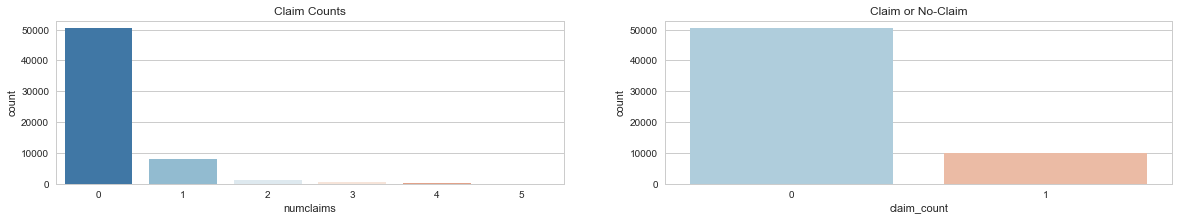

In [16]:
# Plot the Claim counts
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(20,3)
g = sns.countplot(x='numclaims',data=df, palette='RdBu_r', ax=ax1)
title = g.set_title('Claim Counts')

# Since there are very few incidences with claim count>1, we club them together with claim_count
df['claim_count'] = df['numclaims'].apply(lambda x:1 if x>0 else 0)
g = sns.countplot(x='claim_count',data=df, palette='RdBu_r', ax=ax2)
title = g.set_title('Claim or No-Claim')

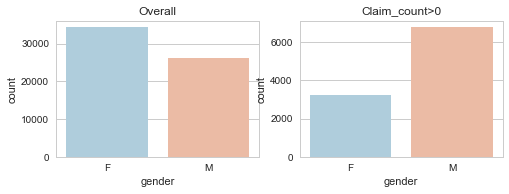

In [17]:
#Sort by sex
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(8,2.5)
g = sns.countplot(x='gender',data=df.sort_values('gender'), palette='RdBu_r', ax=ax1)
title = g.set_title('Overall')
g = sns.countplot(x='gender',data=df[df['claim_count']>0].sort_values('gender'), palette='RdBu_r', ax=ax2)
title = g.set_title('Claim_count>0')

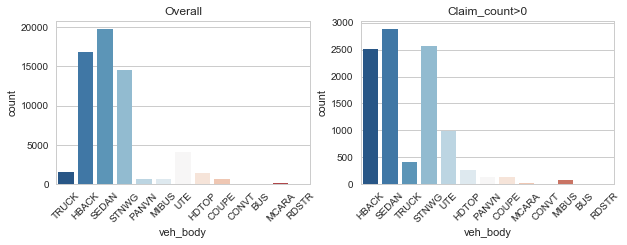

In [18]:
#Visualize Vehicle Body Type
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(10,3)
g = sns.countplot(x='veh_body',data=df, palette='RdBu_r', ax=ax1)
label = g.set_xticklabels(g.get_xticklabels(), rotation=45)
title = g.set_title('Overall')
g = sns.countplot(x='veh_body',data=df[df['claim_count']>0], palette='RdBu_r', ax=ax2)
label = g.set_xticklabels(g.get_xticklabels(), rotation=45)
title = g.set_title('Claim_count>0')

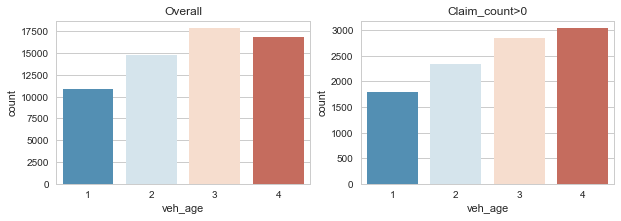

In [19]:
#Visualize Vehicle Age
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(10,3)
g = sns.countplot(x='veh_age',data=df, palette='RdBu_r', ax=ax1)
title = g.set_title('Overall')
g = sns.countplot(x='veh_age',data=df[df['claim_count']>0], palette='RdBu_r', ax=ax2)
title = g.set_title('Claim_count>0')

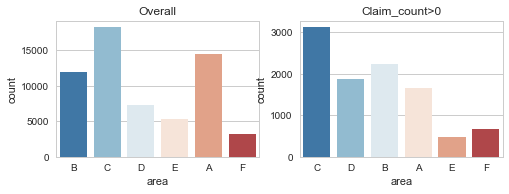

In [20]:
#Visualize Area
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(8,2.5)
g = sns.countplot(x='area',data=df, palette='RdBu_r', ax=ax1)
title = g.set_title('Overall')
g = sns.countplot(x='area',data=df[df['claim_count']>0], palette='RdBu_r', ax=ax2)
title = g.set_title('Claim_count>0')

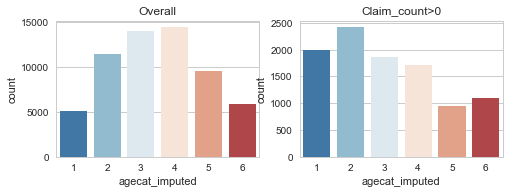

In [21]:
#Visualize Driver Age
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(8,2.5)
g = sns.countplot(x='agecat_imputed',data=df, palette='RdBu_r', ax=ax1)
title = g.set_title('Overall')
g = sns.countplot(x='agecat_imputed',data=df[df['claim_count']>0], palette='RdBu_r', ax=ax2)
title = g.set_title('Claim_count>0')

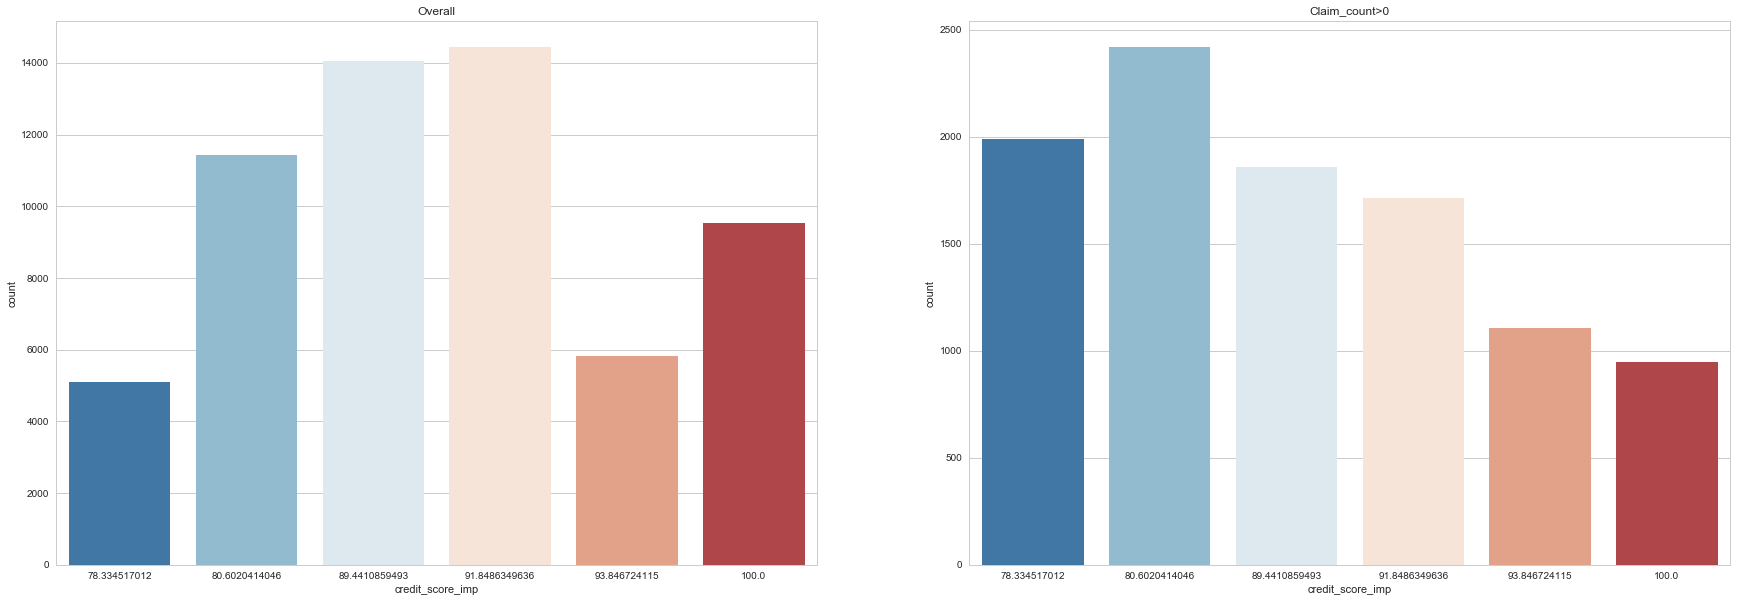

In [22]:
#Visualize Credit_score
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(30,10)
g = sns.countplot(x='credit_score_imp',data=df, palette='RdBu_r', ax=ax1)
title = g.set_title('Overall')
g = sns.countplot(x='credit_score_imp',data=df[df['claim_count']>0], palette='RdBu_r', ax=ax2)
title = g.set_title('Claim_count>0')

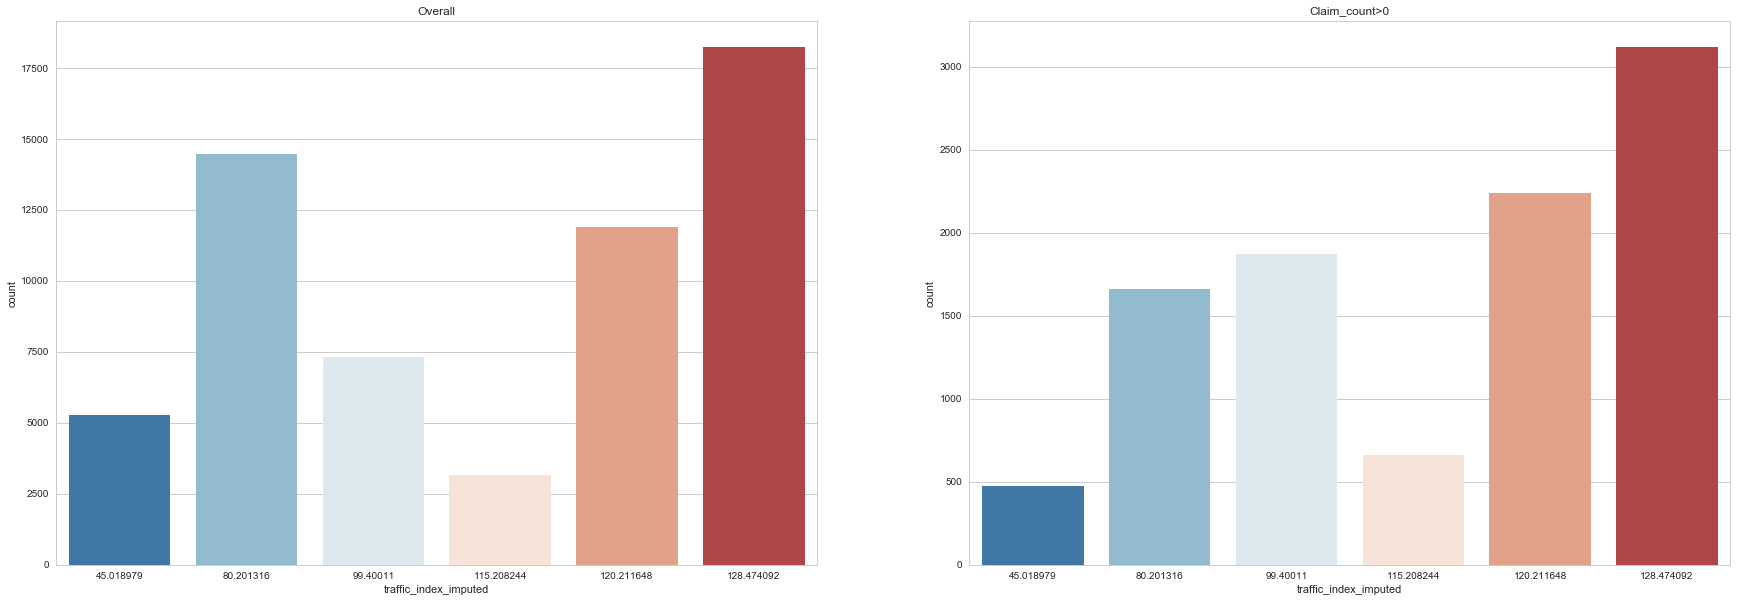

In [23]:
#Visualize Traffic_index
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(30,10)
g = sns.countplot(x='traffic_index_imputed',data=df, palette='RdBu_r', ax=ax1)
title = g.set_title('Overall')
g = sns.countplot(x='traffic_index_imputed',data=df[df['claim_count']>0], palette='RdBu_r', ax=ax2)
title = g.set_title('Claim_count>0')

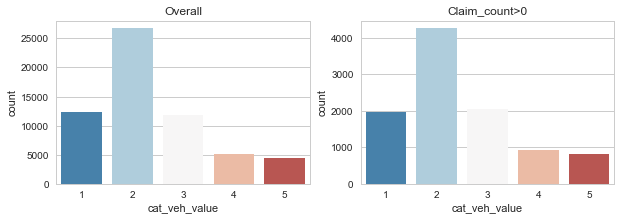

In [24]:
#Make Vehicle Value categorical
df['cat_veh_value'] = df['veh_value'].apply(lambda x:1 if x<=1 else 2 if x<=2 else 3 if x<=3 else 4 if x<=4 else 5)
#Visualize Vehicle Value
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(10,3)
g = sns.countplot(x='cat_veh_value',data=df, palette='RdBu_r', ax=ax1)
title = g.set_title('Overall')
g = sns.countplot(x='cat_veh_value',data=df[df['claim_count']>0], palette='RdBu_r', ax=ax2)
title = g.set_title('Claim_count>0')

## Creating the Model

### One Hot Encoding, creating dummy variables of each attribute

In [25]:
#Function to Prepare the data

def prep_data(df):
    #Prepare the data
    df_dummy = df[['pol_number','credit_score_imp','traffic_index_imputed','claim_count','claimcst0']].copy()
    #Make dummy variables using Pandas
    df_dummy = pd.concat([df_dummy,pd.get_dummies(df['veh_age'],prefix="veh_age")],axis=1)
    df_dummy = pd.concat([df_dummy,pd.get_dummies(df['agecat_imputed'],prefix="agecat_imputed")],axis=1)
    df_dummy = pd.concat([df_dummy,pd.get_dummies(df['veh_body'],prefix="veh_body")],axis=1)
    df_dummy = pd.concat([df_dummy,pd.get_dummies(df['gender'],prefix="gender")],axis=1)
    df_dummy = pd.concat([df_dummy,pd.get_dummies(df['area'],prefix="area")],axis=1)
    df_dummy = pd.concat([df_dummy,pd.get_dummies(df['cat_veh_value'],prefix="cat_veh_value")],axis=1)
    
   
    #We are trying to predict whether there is claim or no claim
    df_dummy['claim_count'] = df_dummy['claim_count'].apply(lambda x: 1 if x>0 else 0)
    return(df_dummy)

In [26]:
df_train = df.copy()

#### Splitting Data into train and validation

In [27]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_train, test_size=0.2, random_state=12345)

In [28]:
#We create a separate X_train and X_test dataset because we would require the categorical variables in the original dataset later 
#X_train and X_test dataframes have only dummy variables
X_train = prep_data(train)
X_test = prep_data(test)

#Create two additional columns for the individual probabilities of claim (prob1) and no-claim (prob0)
X_train['prob0'] = np.zeros(len(X_train))
X_train['prob1'] = np.zeros(len(X_train))

X_test['prob0'] = np.zeros(len(X_test))
X_test['prob1'] = np.zeros(len(X_test))

### Logistic Regression to get the probabilities of atleast one claim or no claim

In [29]:
def logfunc(X_train, X_test):
    
    #In the first part, we use Logistic Regression to get the probabilities of claim vs no-claim
    from sklearn.linear_model import LogisticRegression
    logmodel = LogisticRegression(C=1000, class_weight='balanced')

    n=10

    for i in range (0,n):

        #Choose 3000 Negative Classes
        X_train_temp = X_train.loc[np.random.choice(X_train[X_train['claim_count']==0].index, 3000, replace = False)]
        #Choose 3000 Positive Classes
        X_train_pos = X_train.loc[np.random.choice(X_train[X_train['claim_count']==1].index, 3000, replace = True)]
        #Append the positive classes 
        X_train_temp = X_train_temp.append(X_train_pos, ignore_index=True)

        #Separate into X and Y to train the model
        y_train_temp = X_train_temp['claim_count']
        X_train_temp.drop(['pol_number','claim_count','claimcst0','prob0','prob1'], axis=1,inplace=True)


        #Fit the Logistic Regression Model
        logmodel.fit(X_train_temp,y_train_temp)
        X_train[['prob0','prob1']] = X_train[['prob0','prob1']] + logmodel.predict_proba(X_train.drop(['pol_number','claim_count','claimcst0','prob0','prob1'],axis=1))
        X_test[['prob0','prob1']] = X_test[['prob0','prob1']] + logmodel.predict_proba(X_test.drop(['pol_number','claim_count','claimcst0','prob0','prob1'],axis=1))

    #Divide the log_proba and log_probb values by 10 to get the average log probabilities
    X_train['prob0']=X_train['prob0']/n
    X_train['prob1']=X_train['prob1']/n

    X_test['prob0']=X_test['prob0']/n
    X_test['prob1']=X_test['prob1']/n

    #Check the metrics on training and test data
    logProb = 1
    temp = logProb > (X_test['prob0']/X_test['prob1'])
    X_test['predicted_claim_count']= [1 if (p==True) else 0 for p in temp]

    #Metrics on Test set
    from sklearn.metrics import classification_report
    print(classification_report(X_test['claim_count'],X_test['predicted_claim_count']))

    #Calculate Claim Frequency for Test Set
    X_test['predicted_freq']= X_test['prob1'].divide(X_test['prob0'])
    X_test['predicted_freq']= X_test['predicted_freq'].apply(lambda x: x**3.65)
    return logmodel, X_test, X_train


In [30]:
logmodel, X_test , X_train = logfunc(X_train,X_test)

             precision    recall  f1-score   support

          0       0.91      0.67      0.77     10052
          1       0.29      0.69      0.41      2027

avg / total       0.81      0.67      0.71     12079



In [31]:
X_test1 = X_test.copy() # Gradient Boosted

In [32]:
X_test2 = X_test.copy() # GLM

In [33]:
X_test3 = X_test.copy() # Decision Trees

In [34]:
X_test4 = X_test.copy()  # Extra Trees 

In [35]:
X_test5 = X_test.copy() # Random Forest

### Different Functions for Regression Analysis to Predict Claim Cost

#### Gradient Boosted Function

In [36]:
def xgboostfunc(X_train, X_test1):   
    #Part 2: Use Regression for predicting Claim Severity

    X_test1.drop('predicted_claim_count',axis=1,inplace=True, errors='ignore')

    #Train only on the subset of positive claim counts
    X_train_regress = X_train[X_train['claim_count']>0].copy()
    y_train_regress = np.log(X_train[X_train['claim_count']>0]['claimcst0'])

    #Implement XGBoost for regression
    import xgboost as xgb
    num_round = 1

    T_train_xgb = xgb.DMatrix(X_train_regress.drop(['pol_number','claim_count','claimcst0','prob0','prob1'],axis=1), y_train_regress)
    params = {"objective": "reg:linear"}
    gbm = xgb.train(dtrain=T_train_xgb,params=params)
    predictions = gbm.predict(xgb.DMatrix(X_test1.drop(['pol_number','claim_count','claimcst0','prob0','prob1','predicted_freq'],axis=1)))
    X_test1['predicted_claim_cost']=[np.exp(p) for p in predictions]
    X_test1['predicted_claim_cost']=X_test1['predicted_claim_cost'].multiply(X_test1['predicted_freq'])
    return gbm, X_test1.copy()

In [37]:
gbm, X_test1 = xgboostfunc(X_train,X_test1)

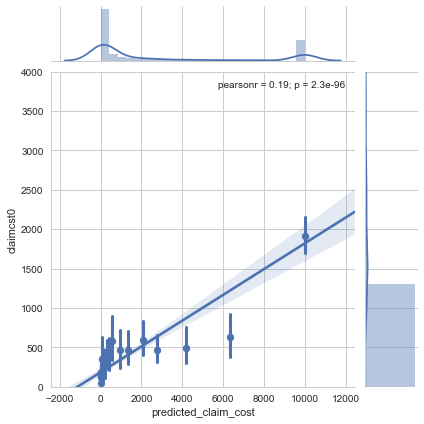

In [38]:
sns.jointplot(X_test1.predicted_claim_cost.clip(upper=10000), X_test1.claimcst0, kind='reg',x_bins=25,ylim=[0,4000])

In [39]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X_test1.claimcst0, X_test1.predicted_claim_cost.clip(upper=10000))**0.5

5212.8275872903332

#### Generalised Linear Model Function

In [40]:
def glmfunc(X_train, X_test2):

    import statsmodels.api as sm
    
    X_test2.drop(['predicted_claim_count','predicted_claim_cost'],axis=1,inplace=True, errors='ignore')

    #Train only on the subset of positive claim counts
    X_train_regress = X_train[X_train['claim_count']>0].copy()
    y_train_regress = np.log(X_train[X_train['claim_count']>0]['claimcst0'])

    fam = sm.families.Poisson()
    glm = sm.GLM(y_train_regress,X_train_regress.drop(['pol_number','claim_count','claimcst0','prob0','prob1'],axis=1), family=fam)
    res = glm.fit()
    predict = res.predict(X_test2.drop(['pol_number','claim_count','claimcst0','prob0','prob1','predicted_freq'],axis=1))
    X_test2['predicted_claim_cost']=[np.exp(p) for p in predict]
    X_test2['predicted_claim_cost']=X_test2['predicted_claim_cost'].multiply(X_test2['predicted_freq'])
    return res, X_test2.copy()

In [41]:
glm, X_test2 = glmfunc(X_train,X_test2)

/Applications/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


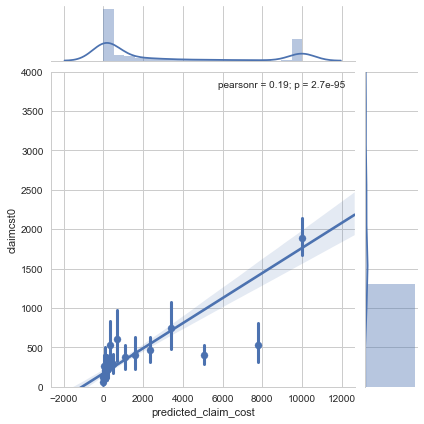

In [42]:
sns.jointplot(X_test2.predicted_claim_cost.clip(upper=10000), X_test2.claimcst0, kind='reg',x_bins=25,ylim=[0,4000])

In [43]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X_test2.claimcst0, X_test2.predicted_claim_cost.clip(upper=10000))**0.5

5343.7993274896289

#### Decision Trees Regressor Function

In [44]:
def DTfunc(X_train, X_test3):   
    #Part 2: Use Regression for predicting Claim Severity
    
    from sklearn.tree import DecisionTreeRegressor

    X_test3.drop(['predicted_claim_count','predicted_claim_cost'],axis=1,inplace=True, errors='ignore')

    #Train only on the subset of positive claim counts
    X_train_regress = X_train[X_train['claim_count']>0].copy()
    y_train_regress = np.log(X_train[X_train['claim_count']>0]['claimcst0'])

    #Implement XGBoost for regression
    from sklearn.tree import DecisionTreeRegressor
    num_round = 1
    clf_entropy = DecisionTreeRegressor(criterion = "mse", random_state = 12345, max_depth = 3, min_samples_leaf = 5,min_samples_split=5)
 
    # Performing training
    dT = clf_entropy.fit(X_train_regress.drop(['pol_number','claim_count','claimcst0','prob0','prob1'],axis=1), y_train_regress)

    predictions = dT.predict(X_test3.drop(['pol_number','claim_count','claimcst0','prob0','prob1','predicted_freq'],axis=1))
    X_test3['predicted_claim_cost']=[np.exp(p) for p in predictions]
    X_test3['predicted_claim_cost']=X_test3['predicted_claim_cost'].multiply(X_test3['predicted_freq'])
    return dT, X_test3.copy()

In [45]:
dT, X_test3 = DTfunc(X_train,X_test3)

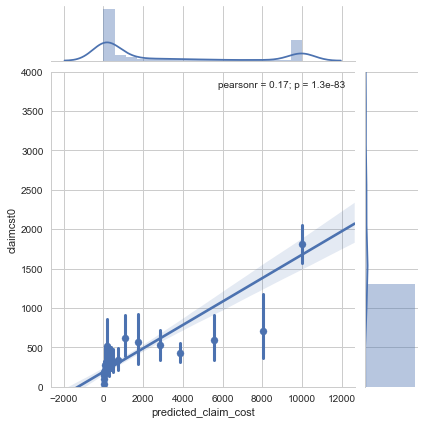

In [46]:
sns.jointplot(X_test3.predicted_claim_cost.clip(upper=10000), X_test3.claimcst0, kind='reg',x_bins=25,ylim=[0,4000])

In [47]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X_test3.claimcst0, X_test3.predicted_claim_cost.clip(upper=10000))**0.5

5419.0163294149907

#### Extra Trees Regressor Function

In [48]:
def ETfunc(X_train, X_test4):   
    #Part 2: Use Regression for predicting Claim Severity
    
    from sklearn.ensemble import ExtraTreesRegressor

    X_test4.drop(['predicted_claim_count','predicted_claim_cost'],axis=1,inplace=True, errors='ignore')

    #Train only on the subset of positive claim counts
    X_train_regress = X_train[X_train['claim_count']>0].copy()
    y_train_regress = np.log(X_train[X_train['claim_count']>0]['claimcst0'])

    #Implement XGBoost for regression
    from sklearn.ensemble import ExtraTreesRegressor
    num_round = 1

    clf = ExtraTreesRegressor(n_estimators=10, criterion = "mse", random_state = 12345, max_depth = 3, min_samples_leaf = 5,min_samples_split=5)
  
    clf2= clf.fit(X_train_regress.drop(['pol_number','claim_count','claimcst0','prob0','prob1'],axis=1), y_train_regress)
    predictions = clf2.predict(X_test4.drop(['pol_number','claim_count','claimcst0','prob0','prob1','predicted_freq'],axis=1))
        
    X_test4['predicted_claim_cost']=[np.exp(p) for p in predictions]
    X_test4['predicted_claim_cost']=X_test4['predicted_claim_cost'].multiply(X_test4['predicted_freq'])
    return clf2, X_test4.copy()

In [49]:
et, X_test4 = ETfunc(X_train,X_test4)

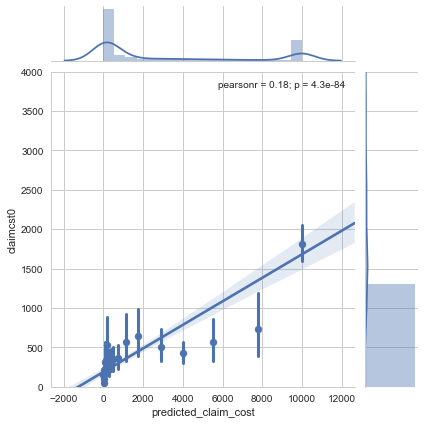

In [50]:
sns.jointplot(X_test4.predicted_claim_cost.clip(upper=10000), X_test4.claimcst0, kind='reg',x_bins=25,ylim=[0,4000])

In [51]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X_test4.claimcst0, X_test4.predicted_claim_cost.clip(upper=10000))**0.5

5410.2703286864962

#### Random Forest Regressor Function

In [52]:
def RFfunc(X_train, X_test5):   
    #Part 2: Use Regression for predicting Claim Severity
    
    from sklearn.ensemble import RandomForestRegressor

    X_test5.drop(['predicted_claim_count','predicted_claim_cost'],axis=1,inplace=True, errors='ignore')

    #Train only on the subset of positive claim counts
    X_train_regress = X_train[X_train['claim_count']>0].copy()
    y_train_regress = np.log(X_train[X_train['claim_count']>0]['claimcst0'])

    num_round = 1

    rf = RandomForestRegressor(criterion = "mse", random_state = 12345, max_depth = 3, min_samples_leaf = 5,min_samples_split=5)
    rf2= rf.fit(X_train_regress.drop(['pol_number','claim_count','claimcst0','prob0','prob1'],axis=1), y_train_regress)
    predictions = rf2.predict(X_test5.drop(['pol_number','claim_count','claimcst0','prob0','prob1','predicted_freq'],axis=1))
        
    X_test5['predicted_claim_cost']=[np.exp(p) for p in predictions]
    X_test5['predicted_claim_cost']=X_test5['predicted_claim_cost'].multiply(X_test5['predicted_freq'])
    return rf2, X_test5.copy()

In [53]:
rf, X_test5 = RFfunc(X_train,X_test5)

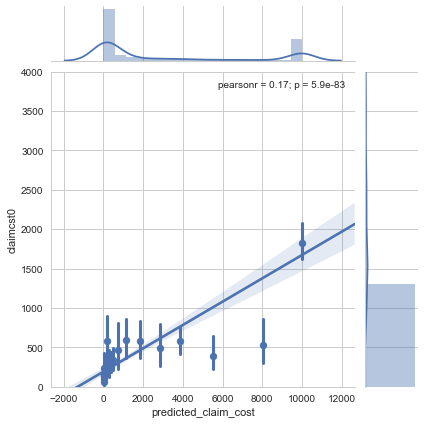

In [54]:
sns.jointplot(X_test5.predicted_claim_cost.clip(upper=10000), X_test5.claimcst0, kind='reg',x_bins=25,ylim=[0,4000])

In [55]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X_test5.claimcst0, X_test5.predicted_claim_cost.clip(upper=10000))**0.5

5420.5194603386844

#### Function to calculate normalized gini coeeficients to evaluate model performance

In [56]:
def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)


def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)

In [57]:
from sklearn.model_selection import KFold

#### Model Selection by Running KFold cross validation 

In [58]:
ginilist_xgb = []
ginilist_glm = []
ginilist_dt = []
ginilist_et = []
ginilist_rf = []
ginilist_avg = []

df_log= pd.DataFrame(data=[])
df_xgb= pd.DataFrame(data=[])
df_glm= pd.DataFrame(data=[])
df_dT= pd.DataFrame(data=[])
df_eT= pd.DataFrame(data=[])
df_RF= pd.DataFrame(data=[])

fold=1
kf = KFold(n_splits=5, random_state=12345) 
for train_index, test_index in kf.split(df_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = df_train.iloc[train_index].copy(), df_train.iloc[test_index].copy()
    
    #We create a separate X_train and X_test dataset because we would require the categorical variables in the original dataset later 
    #X_train and X_test dataframes have only dummy variables
    X_train = prep_data(X_train)
    X_test = prep_data(X_test)
    
    #Create two additional columns for the individual probabilities of claim (prob1) and no-claim (prob0)
    X_train['prob0'] = np.zeros(len(X_train))
    X_train['prob1'] = np.zeros(len(X_train))

    X_test['prob0'] = np.zeros(len(X_test))
    X_test['prob1'] = np.zeros(len(X_test))
    
    logmodel, X_testlog , X_train = logfunc(X_train,X_test)
    
    trainDF_log = X_train.copy()
    testDF_log = X_testlog.copy()
    
    gbm, X_test1 = xgboostfunc(X_train,X_testlog)
    testDF_xgb = X_test1.copy()
    
    glm, X_test2 = glmfunc(X_train,X_testlog)
    testDF_glm = X_test2.copy()
    testDF_glm_factors = X_test2.copy()
    
    dT, X_test3 = DTfunc(X_train,X_testlog)
    testDF_dt = X_test3.copy()
    
    eT, X_test4 = ETfunc(X_train,X_testlog)
    testDF_et = X_test4.copy()
    
    rF, X_test5 = RFfunc(X_train,X_testlog)
    testDF_rf = X_test5.copy()
    
    
    testDF_log['iteration'] = '%s%d' % ('V', fold)
    df_log = pd.concat([df_log, testDF_log])
    testDF_xgb['iteration'] = '%s%d' % ('V', fold)
    df_xgb = pd.concat([df_xgb, testDF_xgb])
    testDF_glm['iteration'] = '%s%d' % ('V', fold)
    df_glm = pd.concat([df_glm, testDF_glm])
    testDF_dt['iteration'] = '%s%d' % ('V', fold)
    df_dT = pd.concat([df_dT, testDF_dt])
    testDF_et['iteration'] = '%s%d' % ('V', fold)
    df_eT = pd.concat([df_eT, testDF_et])
    testDF_rf['iteration'] = '%s%d' % ('V', fold)
    df_RF = pd.concat([df_RF, testDF_rf])

    
    prediction_xgb = X_test1['predicted_claim_cost']
    gininorm_xgb = gini_normalized(X_test1.claimcst0.values,X_test1.predicted_claim_cost.values)
    prediction_glm = X_test2['predicted_claim_cost']
    gininorm_glm = gini_normalized(X_test2.claimcst0.values,X_test2.predicted_claim_cost.values)
    prediction_dt = X_test3['predicted_claim_cost']
    gininorm_dt = gini_normalized(X_test3.claimcst0.values,X_test3.predicted_claim_cost.values)
    prediction_et = X_test4['predicted_claim_cost']
    gininorm_et = gini_normalized(X_test4.claimcst0.values,X_test4.predicted_claim_cost.values)
    prediction_rf = X_test5['predicted_claim_cost']
    gininorm_rf = gini_normalized(X_test5.claimcst0.values,X_test5.predicted_claim_cost.values) 
    
    
    prediction_avg = (prediction_xgb+prediction_glm+prediction_dt+prediction_et+prediction_rf)/5
    gininorm_avg = gini_normalized(X_test1.claimcst0.values,prediction_avg.values)
    
    ginilist_xgb.append(gininorm_xgb)
    ginilist_glm.append(gininorm_glm)
    ginilist_dt.append(gininorm_dt)
    ginilist_et.append(gininorm_et)
    ginilist_rf.append(gininorm_rf)
    ginilist_avg.append(gininorm_avg)
    

TRAIN: [12079 12080 12081 ..., 60389 60390 60391] TEST: [    0     1     2 ..., 12076 12077 12078]
             precision    recall  f1-score   support

          0       0.91      0.67      0.77     10043
          1       0.29      0.67      0.40      2036

avg / total       0.80      0.67      0.71     12079

TRAIN: [    0     1     2 ..., 60389 60390 60391] TEST: [12079 12080 12081 ..., 24155 24156 24157]
             precision    recall  f1-score   support

          0       0.91      0.67      0.77     10065
          1       0.29      0.69      0.41      2014

avg / total       0.81      0.67      0.71     12079

TRAIN: [    0     1     2 ..., 60389 60390 60391] TEST: [24158 24159 24160 ..., 36233 36234 36235]
             precision    recall  f1-score   support

          0       0.91      0.68      0.78     10092
          1       0.29      0.66      0.40      1986

avg / total       0.81      0.68      0.72     12078

TRAIN: [    0     1     2 ..., 60389 60390 60391] TEST: [3

### GLM gave highest gini

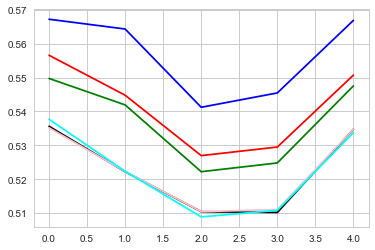

In [59]:
plt.plot(ginilist_xgb, color='red')
plt.plot(ginilist_glm, color='blue')
plt.plot(ginilist_dt, color='black')
plt.plot(ginilist_et, color='pink')
plt.plot(ginilist_rf, color='cyan')
plt.plot(ginilist_avg, color='green')

### Feature Importance for GLM

In [60]:
print(glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              claimcst0   No. Observations:                 8012
Model:                            GLM   Df Residuals:                     7981
Model Family:                 Poisson   Df Model:                           30
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -15952.
Date:                Tue, 08 May 2018   Deviance:                       1271.1
Time:                        05:48:58   Pearson chi2:                 1.26e+03
No. Iterations:                     4                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
credit_score_imp          0.0224      0.000     64.509      0.000       0.022       0.023
traffic_index_imput

In [61]:
colsV1 = ['pol_number','credit_score_imp','veh_age_1','veh_age_2','veh_age_4','agecat_imputed_1','agecat_imputed_2','agecat_imputed_3','agecat_imputed_4','agecat_imputed_5','veh_body_HBACK','veh_body_SEDAN','veh_body_UTE','veh_body_STNWG','gender_F','gender_M','area_C','area_D','area_E','area_F','cat_veh_value_1','cat_veh_value_3','cat_veh_value_4','cat_veh_value_5','claim_count','claimcst0']

#### Running Kfold and evaluating model performance after inputing important features

In [62]:
ginilist_xgb = []
ginilist_glm = []
ginilist_dt = []
ginilist_et = []
ginilist_rf = []
ginilist_avg = []

df_log= pd.DataFrame(data=[])
df_xgb= pd.DataFrame(data=[])
df_glm= pd.DataFrame(data=[])
df_dT= pd.DataFrame(data=[])
df_eT= pd.DataFrame(data=[])
df_RF= pd.DataFrame(data=[])

fold=1
kf = KFold(n_splits=5, random_state=12345) 
for train_index, test_index in kf.split(df_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = df_train.iloc[train_index].copy(), df_train.iloc[test_index].copy()
    
    #We create a separate X_train and X_test dataset because we would require the categorical variables in the original dataset later 
    #X_train and X_test dataframes have only dummy variables
    X_train = prep_data(X_train)
    X_test = prep_data(X_test)
    
    X_train = X_train[colsV1]
    X_test = X_test[colsV1]
    
    #Create two additional columns for the individual probabilities of claim (prob1) and no-claim (prob0)
    X_train['prob0'] = np.zeros(len(X_train))
    X_train['prob1'] = np.zeros(len(X_train))

    X_test['prob0'] = np.zeros(len(X_test))
    X_test['prob1'] = np.zeros(len(X_test))
    
    logmodel, X_testlog , X_train = logfunc(X_train,X_test)
    
    trainDF_log = X_train.copy()
    testDF_log = X_testlog.copy()
    
    gbm, X_test1 = xgboostfunc(X_train,X_testlog)
    testDF_xgb = X_test1.copy()
    
    glm, X_test2 = glmfunc(X_train,X_testlog)
    testDF_glm = X_test2.copy()
    testDF_glm_factors = X_test2.copy()
    
    dT, X_test3 = DTfunc(X_train,X_testlog)
    testDF_dt = X_test3.copy()
    
    eT, X_test4 = ETfunc(X_train,X_testlog)
    testDF_et = X_test4.copy()
    
    rF, X_test5 = RFfunc(X_train,X_testlog)
    testDF_rf = X_test5.copy()
    
    
    testDF_log['iteration'] = '%s%d' % ('V', fold)
    df_log = pd.concat([df_log, testDF_log])
    testDF_xgb['iteration'] = '%s%d' % ('V', fold)
    df_xgb = pd.concat([df_xgb, testDF_xgb])
    testDF_glm['iteration'] = '%s%d' % ('V', fold)
    df_glm = pd.concat([df_glm, testDF_glm])
    testDF_dt['iteration'] = '%s%d' % ('V', fold)
    df_dT = pd.concat([df_dT, testDF_dt])
    testDF_et['iteration'] = '%s%d' % ('V', fold)
    df_eT = pd.concat([df_eT, testDF_et])
    testDF_rf['iteration'] = '%s%d' % ('V', fold)
    df_RF = pd.concat([df_RF, testDF_rf])

    
    prediction_xgb = X_test1['predicted_claim_cost']
    gininorm_xgb = gini_normalized(X_test1.claimcst0.values,X_test1.predicted_claim_cost.values)
    prediction_glm = X_test2['predicted_claim_cost']
    gininorm_glm = gini_normalized(X_test2.claimcst0.values,X_test2.predicted_claim_cost.values)
    prediction_dt = X_test3['predicted_claim_cost']
    gininorm_dt = gini_normalized(X_test3.claimcst0.values,X_test3.predicted_claim_cost.values)
    prediction_et = X_test4['predicted_claim_cost']
    gininorm_et = gini_normalized(X_test4.claimcst0.values,X_test4.predicted_claim_cost.values)
    prediction_rf = X_test5['predicted_claim_cost']
    gininorm_rf = gini_normalized(X_test5.claimcst0.values,X_test5.predicted_claim_cost.values) 
    
    
    prediction_avg = (prediction_xgb+prediction_glm+prediction_dt+prediction_et+prediction_rf)/5
    gininorm_avg = gini_normalized(X_test1.claimcst0.values,prediction_avg.values)
    
    ginilist_xgb.append(gininorm_xgb)
    ginilist_glm.append(gininorm_glm)
    ginilist_dt.append(gininorm_dt)
    ginilist_et.append(gininorm_et)
    ginilist_rf.append(gininorm_rf)
    ginilist_avg.append(gininorm_avg)
   

TRAIN: [12079 12080 12081 ..., 60389 60390 60391] TEST: [    0     1     2 ..., 12076 12077 12078]
             precision    recall  f1-score   support

          0       0.91      0.64      0.75     10043
          1       0.28      0.69      0.40      2036

avg / total       0.81      0.65      0.70     12079

TRAIN: [    0     1     2 ..., 60389 60390 60391] TEST: [12079 12080 12081 ..., 24155 24156 24157]
             precision    recall  f1-score   support

          0       0.92      0.64      0.75     10065
          1       0.28      0.71      0.40      2014

avg / total       0.81      0.65      0.69     12079

TRAIN: [    0     1     2 ..., 60389 60390 60391] TEST: [24158 24159 24160 ..., 36233 36234 36235]
             precision    recall  f1-score   support

          0       0.91      0.65      0.76     10092
          1       0.28      0.68      0.39      1986

avg / total       0.81      0.66      0.70     12078

TRAIN: [    0     1     2 ..., 60389 60390 60391] TEST: [3

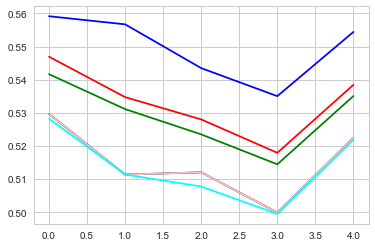

In [63]:
plt.plot(ginilist_xgb, color='red')
plt.plot(ginilist_glm, color='blue')
plt.plot(ginilist_dt, color='black')
plt.plot(ginilist_et, color='pink')
plt.plot(ginilist_rf, color='cyan')
plt.plot(ginilist_avg, color='green')

In [64]:
print(glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              claimcst0   No. Observations:                 8012
Model:                            GLM   Df Residuals:                     7990
Model Family:                 Poisson   Df Model:                           21
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -15956.
Date:                Tue, 08 May 2018   Deviance:                       1278.8
Time:                        05:49:46   Pearson chi2:                 1.27e+03
No. Iterations:                     4                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
credit_score_imp     0.0226      0.000     97.447      0.000       0.022       0.023
veh_age_1            0.1570      0

## GLM Model Uncertainity Removal

In [66]:
# from sklearn.metrics import mutual_info_score
# score = mutual_info_score(X_testlog.claim_count,X_testlog.predicted_claim_count)
# score

In [ ]:
# p_true = pre_holdout_data['Churning'].mean()
# p_false = 1-p_true
# from scipy.stats import entropy
# ent = entropy([p_true,p_false])

In [67]:
# uncertainity_explained = score/ent
# uncertainity_explained

#### Running for Test Data

In [68]:
df_test_valid = pd.read_csv('auto_potential_customers_2018.csv')

#### Data pre processing on Test Data

In [69]:
df_test_valid['date'] = pd.to_datetime(df_test_valid['date_of_birth'])

In [70]:
df_test_valid['year'] = df_test_valid['date'].dt.year

In [71]:
df1_test_valid = df_test_valid.groupby('agecat')['year'].min()
df2_test_valid= df_test_valid.groupby('agecat')['year'].max()

In [72]:
df1_test_valid

agecat
1.0    1990
2.0    1980
3.0    1970
4.0    1960
5.0    1950
6.0    1924
Name: year, dtype: int64

In [73]:
df2_test_valid

agecat
1.0    1999
2.0    1989
3.0    1979
4.0    1969
5.0    1959
6.0    1949
Name: year, dtype: int64

In [74]:
conditions = [
    (df_test_valid['year'] >= 1990) & (df_test_valid['year'] <= 1999),
    (df_test_valid['year'] >= 1980) & (df_test_valid['year'] <= 1989),
    (df_test_valid['year'] >= 1970) & (df_test_valid['year'] <= 1979),
    (df_test_valid['year'] >= 1960) & (df_test_valid['year'] <= 1969),
    (df_test_valid['year'] >= 1950) & (df_test_valid['year'] <= 1959),]
choices = [1,2,3,4,5]
df_test_valid['agecat_imputed'] = np.select(conditions, choices,default=6)

In [75]:
df3_test_valid = df_test_valid.groupby('agecat_imputed')['credit_score'].mean()

In [76]:
df3_test_valid

agecat_imputed
1    582.104396
2    599.992200
3    655.919780
4    670.562428
5    735.518641
6    696.704641
Name: credit_score, dtype: float64

In [77]:
df4_test_valid = df_test_valid.groupby('area')['traffic_index'].mean()

In [78]:
df4_test_valid

area
A     80.464980
B    120.267909
C    129.115227
D    100.589112
E     44.573322
F    114.634286
Name: traffic_index, dtype: float64

In [79]:
conditions1 = [
    (df_test_valid['agecat_imputed'] ==1),
    (df_test_valid['agecat_imputed'] ==2),
    (df_test_valid['agecat_imputed'] ==3),
    (df_test_valid['agecat_imputed'] ==4),
    (df_test_valid['agecat_imputed'] ==5)]
choices1 = [582.104396,599.992200,655.919780,670.562428,735.518641]
df_test_valid['credit_score_imputed'] = np.select(conditions1, choices1,default=696.704641)

In [80]:
df_test_valid['credit_score_imp']=(df_test_valid.credit_score_imputed/df_test_valid.credit_score_imputed.max())*100

In [81]:
conditions2 = [
    (df_test_valid['area'] =='A'),
    (df_test_valid['area'] =='B'),
    (df_test_valid['area'] =='C'),
    (df_test_valid['area'] =='D'),
    (df_test_valid['area'] =='E')]
choices2 = [80.464980,120.267909,129.115227,100.589112,44.573322]
df_test_valid['traffic_index_imputed'] = np.select(conditions2, choices2,default=114.634286)

In [82]:
df_test_valid.rename(columns={'quote_number': 'pol_number'}, inplace=True)

In [83]:
df_test_valid_V1 = df_test_valid.copy()

#### One Hot Encoding on Test Data

In [84]:
#Function to Prepare the data

def prep_data_test(df):
    #Prepare the data
    #Make Vehicle Value categorical
    df['cat_veh_value'] = df['veh_value'].apply(lambda x:1 if x<=1 else 2 if x<=2 else 3 if x<=3 else 4 if x<=4 else 5)
    df_dummy = df[['pol_number','credit_score_imp','traffic_index_imputed']].copy()
    #Make dummy variables using Pandas
    df_dummy = pd.concat([df_dummy,pd.get_dummies(df['veh_age'],prefix="veh_age")],axis=1)
    df_dummy = pd.concat([df_dummy,pd.get_dummies(df['agecat_imputed'],prefix="agecat_imputed")],axis=1)
    df_dummy = pd.concat([df_dummy,pd.get_dummies(df['veh_body'],prefix="veh_body")],axis=1)
    df_dummy = pd.concat([df_dummy,pd.get_dummies(df['gender'],prefix="gender")],axis=1)
    df_dummy = pd.concat([df_dummy,pd.get_dummies(df['area'],prefix="area")],axis=1)
    df_dummy = pd.concat([df_dummy,pd.get_dummies(df['cat_veh_value'],prefix="cat_veh_value")],axis=1)
    
    return(df_dummy)

In [85]:
X_test_final = prep_data_test(df_test_valid)

In [86]:
X_test_final_V1 = X_test_final.copy()

In [87]:
X_test_final.columns

Index(['pol_number', 'credit_score_imp', 'traffic_index_imputed', 'veh_age_1',
       'veh_age_2', 'veh_age_3', 'veh_age_4', 'agecat_imputed_1',
       'agecat_imputed_2', 'agecat_imputed_3', 'agecat_imputed_4',
       'agecat_imputed_5', 'agecat_imputed_6', 'veh_body_BUS',
       'veh_body_CONVT', 'veh_body_COUPE', 'veh_body_HBACK', 'veh_body_HDTOP',
       'veh_body_MCARA', 'veh_body_MIBUS', 'veh_body_PANVN', 'veh_body_RDSTR',
       'veh_body_SEDAN', 'veh_body_STNWG', 'veh_body_TRUCK', 'veh_body_UTE',
       'gender_F', 'gender_M', 'area_A', 'area_B', 'area_C', 'area_D',
       'area_E', 'area_F', 'cat_veh_value_1', 'cat_veh_value_2',
       'cat_veh_value_3', 'cat_veh_value_4', 'cat_veh_value_5'],
      dtype='object')

#### Inputting only improtant features before prediction

In [88]:
colsV2 = ['pol_number','credit_score_imp','veh_age_1','veh_age_2','veh_age_4','agecat_imputed_1','agecat_imputed_2','agecat_imputed_3','agecat_imputed_4','agecat_imputed_5','veh_body_HBACK','veh_body_SEDAN','veh_body_UTE','veh_body_STNWG','gender_F','gender_M','area_C','area_D','area_E','area_F','cat_veh_value_1','cat_veh_value_3','cat_veh_value_4','cat_veh_value_5']
X_test_final = X_test_final[colsV2]

## Customers with a low probability of having any claims in 2018
### Predicted_claim_count is 0

In [89]:

#Create two additional columns for the individual probabilities of claim (prob1) and no-claim (prob0)
X_test_final['prob0'] = np.zeros(len(X_test_final))
X_test_final['prob1'] = np.zeros(len(X_test_final))

n=10

for i in range (0,n):

    X_test_final[['prob0','prob1']] = X_test_final[['prob0','prob1']] + logmodel.predict_proba(X_test_final.drop(['pol_number','prob0','prob1'],axis=1))
            
        
#Divide the log_proba and log_probb values by 10 to get the average log probabilities
X_test_final['prob0']=X_test_final['prob0']/n
X_test_final['prob1']=X_test_final['prob1']/n

  
#Check the metrics on training and test data
logProb = 1
temp = logProb > (X_test_final['prob0']/X_test_final['prob1'])
X_test_final['predicted_claim_count']= [1 if (p==True) else 0 for p in temp]

    
#Calculate Claim Frequency for Test Set
X_test_final['predicted_freq']= X_test_final['prob1'].divide(X_test_final['prob0'])
X_test_final['predicted_freq']= X_test_final['predicted_freq'].apply(lambda x: x**3.65)



In [90]:
X_test_final_V2 = X_test_final.copy()

#Train only on the subset of positive claim counts
X_test_final_regress = X_test_final[X_test_final['predicted_claim_count']>0].copy()

## Customers with the lowest cost per claim in 2018, given that a claim occurs

In [91]:
predict = glm.predict(X_test_final_regress.drop(['pol_number','predicted_claim_count','prob0','prob1','predicted_freq'],axis=1))
X_test_final_regress['predicted_claim_cost']=[np.exp(p) for p in predict]
#X_test_final_regress['predicted_claim_cost']=X_test_final_regress['predicted_claim_cost'].multiply(X_test_final_regress['predicted_freq'])   

## Risk Profile Groups 

In [92]:
X_test_final_regress.describe()

,pol_number,credit_score_imp,veh_age_1,veh_age_2,veh_age_4,agecat_imputed_1,agecat_imputed_2,agecat_imputed_3,agecat_imputed_4,agecat_imputed_5,...,area_F,cat_veh_value_1,cat_veh_value_3,cat_veh_value_4,cat_veh_value_5,prob0,prob1,predicted_claim_count,predicted_freq,predicted_claim_cost
count,2.947000e+03,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.0,2947.000000,2947.000000
mean,5.496991e+07,86.961674,0.188327,0.220224,0.317611,0.213437,0.228029,0.198846,0.178826,0.057007,...,0.068205,0.205972,0.216491,0.085171,0.093994,0.354981,0.645019,1.0,136.645614,2536.248075
std,2.596977e+07,6.401339,0.391040,0.414468,0.465626,0.409803,0.419632,0.399200,0.383272,0.231896,...,0.252140,0.404479,0.411923,0.279184,0.291870,0.098953,0.098953,0.0,768.821967,4790.210382
min,1.009346e+07,79.142032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.066360,0.500155,1.0,1.002266,234.888395
25%,3.211660e+07,81.574030,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.294530,0.567303,1.0,2.687515,675.804195
50%,5.535833e+07,89.177859,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.374126,0.625874,1.0,6.541221,1276.769349
75%,7.767625e+07,91.168652,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.432697,0.705470,1.0,24.246056,2576.491287
max,9.997116e+07,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.499845,0.933640,1.0,15530.741371,142797.715332


In [93]:
df_final_stats = X_test_final_regress.describe()

In [94]:
conditions_final = [
    (X_test_final_regress['predicted_claim_cost'] <= 1000),
    (X_test_final_regress['predicted_claim_cost'] > 1000) & (X_test_final_regress['predicted_claim_cost'] < 10000),
    (X_test_final_regress['predicted_claim_cost'] >= 10000)]
choices_final = [1,2,3]
X_test_final_regress['risk_profile_groups'] = np.select(conditions_final,choices_final)

In [95]:
X_test_final_regress_riskgrp1 = X_test_final_regress[X_test_final_regress.risk_profile_groups==1]

In [96]:
X_test_final_regress_riskgrp2 = X_test_final_regress[X_test_final_regress.risk_profile_groups==2]

In [97]:
X_test_final_regress_riskgrp3 = X_test_final_regress[X_test_final_regress.risk_profile_groups==3]

In [98]:
X_test_final_regress_riskgrp1.describe()

,pol_number,credit_score_imp,veh_age_1,veh_age_2,veh_age_4,agecat_imputed_1,agecat_imputed_2,agecat_imputed_3,agecat_imputed_4,agecat_imputed_5,...,cat_veh_value_1,cat_veh_value_3,cat_veh_value_4,cat_veh_value_5,prob0,prob1,predicted_claim_count,predicted_freq,predicted_claim_cost,risk_profile_groups
count,1.173000e+03,1173.000000,1173.0,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,...,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.0,1173.000000,1173.000000,1173.0
mean,5.427818e+07,88.316455,0.0,0.119352,0.582268,0.082694,0.196931,0.329923,0.299233,0.069054,...,0.387894,0.154305,0.035806,0.006820,0.374424,0.625576,1.0,62.845956,599.495267,1.0
std,2.572378e+07,5.380759,0.0,0.324341,0.493396,0.275537,0.397849,0.470386,0.458117,0.253654,...,0.487478,0.361395,0.185884,0.082337,0.090664,0.090664,0.0,279.782916,203.249216,0.0
min,1.031372e+07,79.142032,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.103011,0.500155,1.0,1.002266,234.888395,1.0
25%,3.176463e+07,81.574030,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.309238,0.557064,1.0,2.308915,422.905623,1.0
50%,5.345764e+07,89.177859,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.395119,0.604881,1.0,4.731947,573.702127,1.0
75%,7.650403e+07,91.168652,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.442936,0.690762,1.0,18.792154,767.676133,1.0
max,9.984322e+07,100.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.499845,0.896989,1.0,2695.565231,991.336493,1.0


In [99]:
riskprof1_stats=X_test_final_regress_riskgrp1.describe()

In [100]:
X_test_final_regress_riskgrp2.describe()

,pol_number,credit_score_imp,veh_age_1,veh_age_2,veh_age_4,agecat_imputed_1,agecat_imputed_2,agecat_imputed_3,agecat_imputed_4,agecat_imputed_5,...,cat_veh_value_1,cat_veh_value_3,cat_veh_value_4,cat_veh_value_5,prob0,prob1,predicted_claim_count,predicted_freq,predicted_claim_cost,risk_profile_groups
count,1.653000e+03,1653.000000,1653.000000,1653.000000,1653.000000,1653.000000,1653.000000,1653.000000,1653.000000,1653.000000,...,1653.000000,1653.000000,1653.000000,1653.000000,1653.000000,1653.000000,1653.0,1653.000000,1653.000000,1653.0
mean,5.543672e+07,86.059983,0.270417,0.303085,0.153055,0.289776,0.257713,0.119177,0.104053,0.051422,...,0.091954,0.256503,0.103448,0.136116,0.343986,0.656014,1.0,158.162906,2732.386661,2.0
std,2.601978e+07,6.804156,0.444310,0.459731,0.360150,0.453796,0.437508,0.324095,0.305422,0.220923,...,0.289048,0.436835,0.304636,0.343016,0.100265,0.100265,0.0,830.527957,1865.096725,0.0
min,1.009346e+07,79.142032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.066423,0.501857,1.0,1.027479,1002.727364,2.0
25%,3.238024e+07,79.142032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.286418,0.575968,1.0,3.058059,1408.264283,2.0
50%,5.652248e+07,81.574030,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.361798,0.638202,1.0,7.937693,2065.122857,2.0
75%,7.847139e+07,91.168652,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.424032,0.713582,1.0,27.991281,3336.750093,2.0
max,9.997116e+07,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.498143,0.933577,1.0,15472.991576,9918.436214,2.0


In [101]:
riskprof2_stats=X_test_final_regress_riskgrp2.describe()

In [102]:
X_test_final_regress_riskgrp3.describe()

,pol_number,credit_score_imp,veh_age_1,veh_age_2,veh_age_4,agecat_imputed_1,agecat_imputed_2,agecat_imputed_3,agecat_imputed_4,agecat_imputed_5,...,cat_veh_value_1,cat_veh_value_3,cat_veh_value_4,cat_veh_value_5,prob0,prob1,predicted_claim_count,predicted_freq,predicted_claim_cost,risk_profile_groups
count,1.210000e+02,121.000000,121.000000,121.000000,121.0,121.000000,121.000000,121.000000,121.000000,121.000000,...,121.0,121.000000,121.000000,121.000000,121.000000,121.000000,121.0,121.000000,121.000000,121.0
mean,5.529849e+07,86.146275,0.892562,0.066116,0.0,0.438017,0.123967,0.016529,0.033058,0.016529,...,0.0,0.272727,0.314050,0.363636,0.316697,0.683303,1.0,558.124253,18632.065941,3.0
std,2.768185e+07,7.487210,0.310957,0.249517,0.0,0.498206,0.330914,0.128028,0.179531,0.128028,...,0.0,0.447214,0.466066,0.483046,0.121937,0.121937,0.0,2002.998959,14717.498474,0.0
min,1.085354e+07,79.142032,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.066360,0.500324,1.0,1.004738,10017.995749,3.0
25%,3.281682e+07,79.142032,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.217672,0.593154,1.0,3.959500,11248.790942,3.0
50%,5.649260e+07,81.574030,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.339050,0.660950,1.0,11.432828,13756.092738,3.0
75%,8.020378e+07,94.722907,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.000000,1.000000,1.000000,0.406846,0.782328,1.0,106.631618,21934.239909,3.0
max,9.918589e+07,100.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,0.499676,0.933640,1.0,15530.741371,142797.715332,3.0


In [103]:
riskprof3_stats=X_test_final_regress_riskgrp3.describe()

### CSV finals for TABLEAU VISUALIZATIONS

In [104]:
X_test_final_V2.to_csv("low_probable_customers_2018.csv", header=True)

In [105]:
X_test_final_regress.to_csv("low_claim_cost_2018.csv", header=True)

In [106]:
X_test_final_regress_riskgrp3.to_csv("risk_profile_3.csv",header=True)

In [107]:
X_test_final_regress_riskgrp2.to_csv("risk_profile_2.csv",header=True)

In [108]:
X_test_final_regress_riskgrp1.to_csv("risk_profile_1.csv",header=True)

In [109]:
df_final_stats.to_csv("final_stats.csv",header=True)

In [110]:
riskprof1_stats.to_csv("riskprof1_stats.csv",header=True)

In [111]:
riskprof2_stats.to_csv("riskprof2_stats.csv",header=True)

In [112]:
riskprof3_stats.to_csv("riskprof3_stats.csv",header=True)